<a href="https://colab.research.google.com/github/PedrinHm/Labs_Machine_Learning/blob/main/M%C3%A3os_%C3%A0_Obra_Aprendizado_de_M%C3%A1quina_com_Scikit_Learning%2C_Keras_e_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
# redimensionar as imagens
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

print("X_train:{}".format(X_train.shape))
print("X_test:\t{}".format(X_test.shape))

X_train:(55000, 28, 28, 1)
X_test:	(10000, 28, 28, 1)


In [6]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_train)

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, 3, padding="same", activation='relu',))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(10, activation='softmax'))

In [10]:
model.layers

In [11]:
hidden1 = model.layers[1]
hidden1.name
model.get_layer

<bound method Model.get_layer of <keras.src.engine.sequential.Sequential object at 0x7cddfe5c3eb0>>

In [12]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [13]:
history = model.fit(X_train, y_train, epochs=10,
                    batch_size=256, validation_split=(0.3))

Epoch 1/10
151/151 [==============================] - 278s 2s/step - loss: 1.0897 - accuracy: 0.6504 - val_loss: 2.1182 - val_accuracy: 0.3521
Epoch 2/10
151/151 [==============================] - 276s 2s/step - loss: 0.6784 - accuracy: 0.7692 - val_loss: 1.0915 - val_accuracy: 0.6188
Epoch 3/10
151/151 [==============================] - 275s 2s/step - loss: 0.5682 - accuracy: 0.8005 - val_loss: 0.5211 - val_accuracy: 0.8099
Epoch 4/10
151/151 [==============================] - 256s 2s/step - loss: 0.5179 - accuracy: 0.8178 - val_loss: 0.3861 - val_accuracy: 0.8586
Epoch 5/10
151/151 [==============================] - 260s 2s/step - loss: 0.4758 - accuracy: 0.8308 - val_loss: 0.3692 - val_accuracy: 0.8638
Epoch 6/10
151/151 [==============================] - 277s 2s/step - loss: 0.4575 - accuracy: 0.8379 - val_loss: 0.3406 - val_accuracy: 0.8761
Epoch 7/10
151/151 [==============================] - 274s 2s/step - loss: 0.4310 - accuracy: 0.8454 - val_loss: 0.3338 - val_accuracy: 0.8768

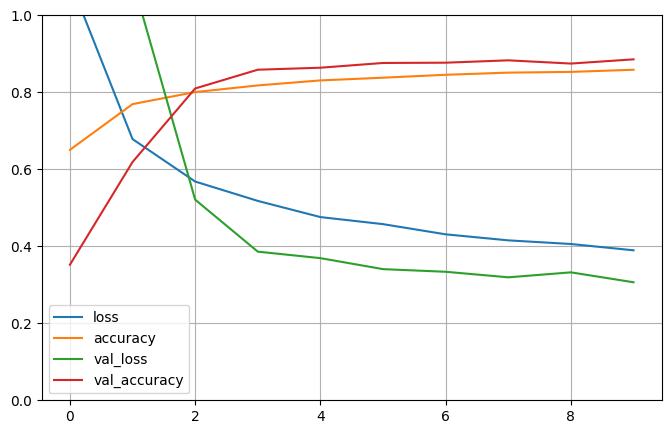

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # defina o intervalo vertical para [0-1]
plt.show()

In [19]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")


Saved model to disk
